<a href="https://colab.research.google.com/github/marcochisci/Anomaly_detection/blob/main/One_Month_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airquino Table Data of 1 month
Getting all the datas of September 2021 from the station 68

In [1]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query = """select * from crosstab(
  'select sd.data_acquired as timestamp, s.sensor_type ,  sd.float_value as value 
from station_data sd join sensor s on s.id = sd.sensor_id
where sd.data_acquired >= to_timestamp(''2021-09-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
 and sd.data_acquired <= to_timestamp(''2021-10-01 00:00:00'', ''YYYY-mm-dd HH24:MI:SS'')
and sd.station_id = 68 order by sd.data_acquired asc, 1'
 , $$VALUES ('O3'::varchar), ('PM2.5'::varchar), ('CO2'::varchar), ('Temp. int.'::varchar), ('T'::varchar)
 , ('PM10'::varchar), ('RH'::varchar), ('NO2'::varchar), ('CO'::varchar), ('VOC'::varchar)$$
) AS value ("Dates" timestamp, "O3" float, "PM2.5" float, "CO2" float, "Temp. int." float, "T" float, "PM10" float,
"RH" float, "NO2" float, "CO" float, "VOC" float);
 """.format(29510692, 23284701)  #23284701 is a specific station

df = pd.read_sql(query, conn)
df= df.set_index('Dates')

#removing nans
df = df.dropna()

display(df)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
Dates,,,,,,,,,,
2021-09-01 00:00:00,388.0,2.0,445.0,3312.0,200.0,2.0,751.0,166.0,256.0,373.0
2021-09-01 00:01:00,389.0,2.0,418.0,3306.0,199.0,2.0,757.0,169.0,256.0,375.0
2021-09-01 00:03:00,389.0,2.0,437.0,3300.0,198.0,2.0,760.0,168.0,258.0,375.0
2021-09-01 00:04:00,390.0,3.0,442.0,3293.0,198.0,3.0,762.0,169.0,256.0,374.0
2021-09-01 00:06:00,391.0,2.0,454.0,3293.0,198.0,2.0,759.0,169.0,256.0,375.0
...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:54:00,123.0,9.0,418.0,3268.0,205.0,10.0,635.0,122.0,244.0,347.0
2021-09-30 23:56:00,167.0,8.0,420.0,3268.0,205.0,9.0,635.0,122.0,244.0,348.0
2021-09-30 23:57:00,125.0,8.0,420.0,3268.0,205.0,9.0,634.0,122.0,245.0,345.0


Plots

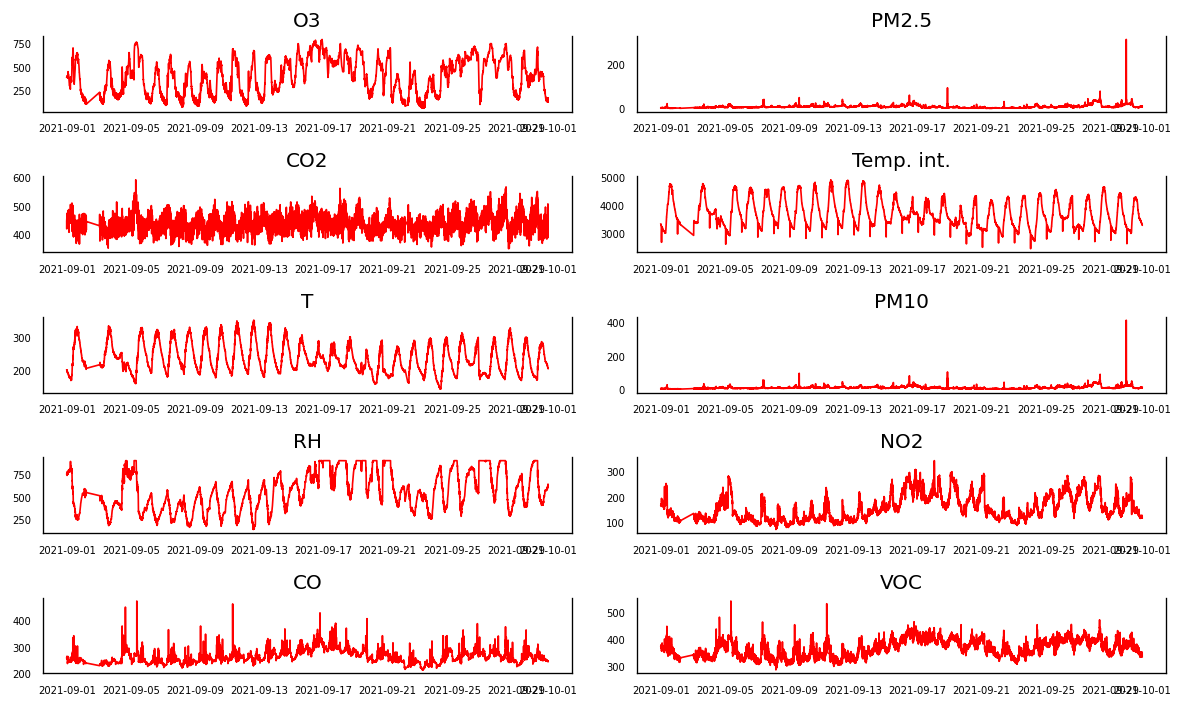

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

You can also use the next cell to get an average of all the values in a choosen timeframe (you can choose it by changing "1 day" to whatever you want)

,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC
Dates,,,,,,,,,,
2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120
2021-09-02,129.617647,0.970588,440.965686,3398.004902,216.397059,1.068627,550.475490,107.465686,240.857843,329.294118
2021-09-03,285.329966,3.071829,420.029181,3947.392817,260.654321,3.383838,358.667789,110.649832,236.164983,337.869809
2021-09-04,317.694952,5.779807,432.121375,3522.009667,223.563910,6.240602,613.174006,142.679914,263.694952,360.341568
2021-09-05,501.713362,6.313578,449.060345,3767.026940,243.403017,6.896552,523.158405,163.450431,254.504310,367.275862
2021-09-06,265.364516,4.323656,430.903226,3861.450538,255.860215,4.704301,356.321505,107.547312,238.839785,335.845161
2021-09-07,312.301179,6.515541,436.480171,3810.236870,250.523044,7.095391,369.227224,116.364416,245.354770,341.546624
2021-09-08,258.265525,6.004283,423.920771,3875.926124,256.841542,6.476445,324.458244,100.709850,237.087794,327.629550
2021-09-09,259.512273,7.987193,428.096051,3827.180363,249.330843,8.742796,403.718250,106.101387,249.373533,331.425827


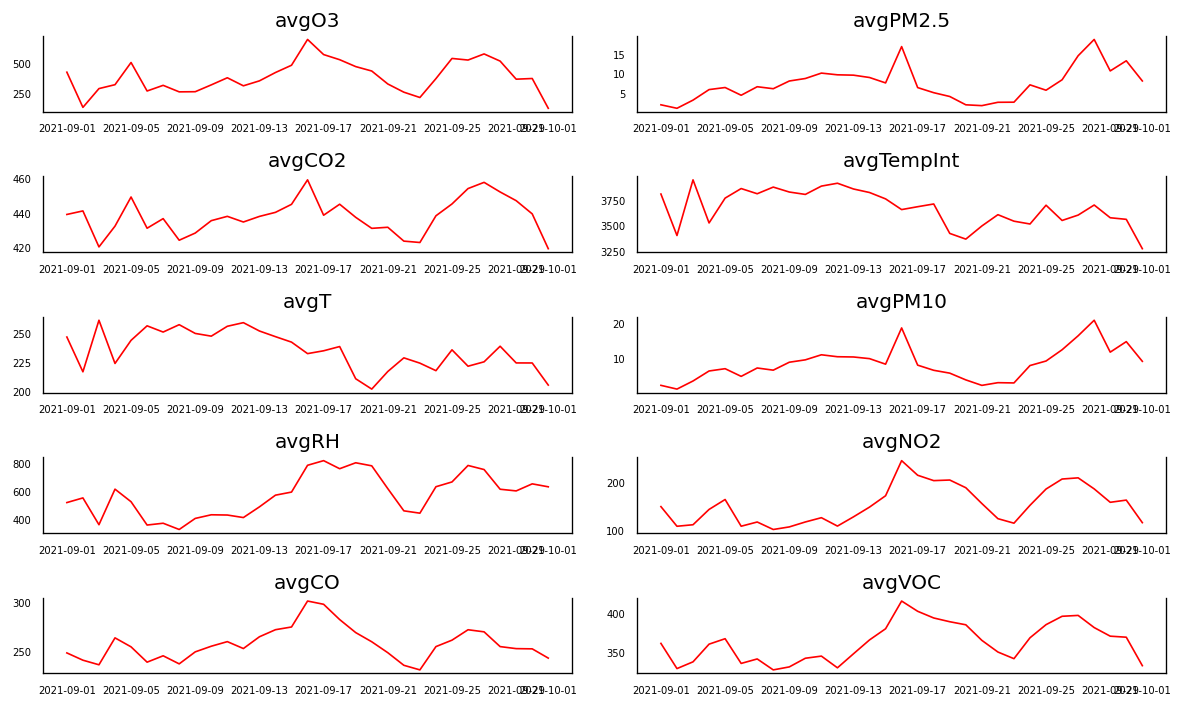

In [3]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select time_bucket('1 day', c."Dates" ) as "bucket", avg(c."O3") as "avgO3" ,  avg(c."PM2.5") as "avgPM2.5", avg(c."CO2") as "avgCO2",
 avg(c."Temp. int.") as "avgTempInt",  avg(c."T") as "avgT",  avg(c."PM10") as "avgPM10", avg(c."RH") as "avgRH", avg(c."NO2") as 
 "avgNO2", avg(c."CO") as "avgCO", avg(c."VOC") as "avgVOC"
from columnvalues1month c 
group by bucket
order by bucket asc;
 """

timebucket = pd.read_sql(query, conn)
timebucket= timebucket.rename(columns={'bucket': 'Dates'})
timebucket=timebucket.set_index('Dates')
display(timebucket)

# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = timebucket[timebucket.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(timebucket.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing stationarity 

Test first 3 colums: O3, PM2.5, CO2

In [4]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]                   
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

adf_test_results1 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[0:3]].columns
}
adf_test_results1    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{'CO2': 'Stationary', 'O3': 'Stationary', 'PM2.5': 'Stationary'}

Test T, Temp. int. and PM10

In [5]:
adf_test_results2 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[3:6]].columns
}
adf_test_results2   

{'PM10': 'Stationary', 'T': 'Stationary', 'Temp. int.': 'Stationary'}

Test RH, NO2, CO and VOC

In [6]:
adf_test_results3 = {
    col: test_stationarity(df, col)
    for col in df[df.columns[6:10]].columns
}
adf_test_results3   

{'CO': 'Stationary',
 'NO2': 'Stationary',
 'RH': 'Stationary',
 'VOC': 'Stationary'}

Converting to stationary with differencing

In [ ]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
for col in df.columns:
    df[col] = differencing(df, col, 1)

Test for Stationarity now

# VAR model

Finding the best lag for VAR model

In [7]:
from statsmodels.tsa.api import VAR
max_lag = 60
var_model = VAR(df)
# select the best lag order
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


25


Finding anomalies

In [8]:
import numpy as np

#0 means that is it not an anomaly
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold
var = VAR(df)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [9]:
data = df.iloc[selected_lag:, :]
data['Predictions'] = predictions.values
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions
Dates,,,,,,,,,,,
2021-09-01 00:38:00,384.0,2.0,445.0,3262.0,198.0,3.0,748.0,165.0,253.0,372.0,0
2021-09-01 00:39:00,386.0,2.0,446.0,3262.0,197.0,2.0,753.0,167.0,254.0,374.0,0
2021-09-01 00:41:00,387.0,2.0,450.0,3262.0,196.0,3.0,758.0,168.0,253.0,373.0,0
2021-09-01 00:42:00,389.0,2.0,452.0,3256.0,194.0,2.0,765.0,170.0,254.0,375.0,0
2021-09-01 00:44:00,391.0,2.0,455.0,3256.0,193.0,3.0,774.0,169.0,253.0,366.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:54:00,123.0,9.0,418.0,3268.0,205.0,10.0,635.0,122.0,244.0,347.0,0
2021-09-30 23:56:00,167.0,8.0,420.0,3268.0,205.0,9.0,635.0,122.0,244.0,348.0,0
2021-09-30 23:57:00,125.0,8.0,420.0,3268.0,205.0,9.0,634.0,122.0,245.0,345.0,0


In [10]:
data['Predictions'].value_counts()

0    26909
1      128
Name: Predictions, dtype: int64

Forecasting the values using the var model

In [11]:
forecast_input = df.values[-selected_lag:]
forecast = var_fitresults.forecast(y=forecast_input, steps=len(df)-selected_lag)
print(forecast)

[[123.25663162   7.97327608 420.61737461 ... 116.60316102 243.02342175
  340.02854542]
 [119.75324677   7.51611724 421.88487789 ... 118.24823566 243.03802667
  341.88140607]
 [121.78845476   7.5370823  422.540734   ... 118.17140968 242.78777105
  342.06646162]
 ...
 [393.25557891   7.38080409 438.07472236 ... 153.53780181 258.0562243
  364.0636366 ]
 [393.25557891   7.38080409 438.07472236 ... 153.53780181 258.0562243
  364.0636366 ]
 [393.25557891   7.38080409 438.07472236 ... 153.53780181 258.0562243
  364.0636366 ]]


Converting the forecasted values into a dataframe

In [12]:
from numpy import sqrt 
from sklearn.metrics import mean_squared_error

#converting predictions to dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(forecast)),columns=[cols])
for j in range(0,10):
    for i in range(0, len(forecast)):
       pred.iloc[i][j] = forecast[i][j]


In [13]:
display(pred)

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC
0,123.257,7.97328,420.617,3269.77,204.648,8.54251,630.421,116.603,243.023,340.029
1,119.753,7.51612,421.885,3271.48,204.55,8.12952,630.645,118.248,243.038,341.881
2,121.788,7.53708,422.541,3276.75,204.464,8.05895,631.229,118.171,242.788,342.066
3,119.941,7.74953,423.794,3272.5,204.385,8.34573,631.728,118.863,241.638,341.654
4,120.303,7.7214,423.495,3270.57,204.208,8.27081,632.004,119.484,242.465,342.532
...,...,...,...,...,...,...,...,...,...,...
27032,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
27033,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
27034,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
27035,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064


Creating a data frame with all the informations:
on the left side there are the actual values and on the right side there are the predicted values;
0 means it is not an anomaly and 1 means it is

In [14]:
data.reset_index(drop=True, inplace=True)
results=pd.concat([data, pred], axis=1)
results['Dates'] = df.index[selected_lag:]
# fix data
data['Dates']=df.index[selected_lag:]
data=data.set_index('Dates')
#print results
results=results.set_index('Dates')
results

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,"(O3,)","(PM2.5,)","(CO2,)","(Temp. int.,)","(T,)","(PM10,)","(RH,)","(NO2,)","(CO,)","(VOC,)"
Dates,,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:38:00,384.0,2.0,445.0,3262.0,198.0,3.0,748.0,165.0,253.0,372.0,0,123.257,7.97328,420.617,3269.77,204.648,8.54251,630.421,116.603,243.023,340.029
2021-09-01 00:39:00,386.0,2.0,446.0,3262.0,197.0,2.0,753.0,167.0,254.0,374.0,0,119.753,7.51612,421.885,3271.48,204.55,8.12952,630.645,118.248,243.038,341.881
2021-09-01 00:41:00,387.0,2.0,450.0,3262.0,196.0,3.0,758.0,168.0,253.0,373.0,0,121.788,7.53708,422.541,3276.75,204.464,8.05895,631.229,118.171,242.788,342.066
2021-09-01 00:42:00,389.0,2.0,452.0,3256.0,194.0,2.0,765.0,170.0,254.0,375.0,0,119.941,7.74953,423.794,3272.5,204.385,8.34573,631.728,118.863,241.638,341.654
2021-09-01 00:44:00,391.0,2.0,455.0,3256.0,193.0,3.0,774.0,169.0,253.0,366.0,0,120.303,7.7214,423.495,3270.57,204.208,8.27081,632.004,119.484,242.465,342.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:54:00,123.0,9.0,418.0,3268.0,205.0,10.0,635.0,122.0,244.0,347.0,0,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
2021-09-30 23:56:00,167.0,8.0,420.0,3268.0,205.0,9.0,635.0,122.0,244.0,348.0,0,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
2021-09-30 23:57:00,125.0,8.0,420.0,3268.0,205.0,9.0,634.0,122.0,245.0,345.0,0,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064


This are the detected anomalies

In [15]:
anomalies = results[(results['Predictions'] == 1)]
anomalies

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,Predictions,"(O3,)","(PM2.5,)","(CO2,)","(Temp. int.,)","(T,)","(PM10,)","(RH,)","(NO2,)","(CO,)","(VOC,)"
Dates,,,,,,,,,,,,,,,,,,,,,
2021-09-01 01:06:00,404.0,2.0,448.0,2650.0,192.0,2.0,763.0,193.0,235.0,364.0,1,122.583,7.64072,425.046,3267.33,202.353,8.23361,639.049,122.4,244.213,344.803
2021-09-01 05:41:00,379.0,4.0,438.0,3056.0,178.0,4.0,863.0,222.0,258.0,390.0,1,289.723,7.66782,443.306,3302.04,198.977,8.42015,657.52,154.386,249.337,364.617
2021-09-01 09:37:00,677.0,4.0,445.0,3850.0,251.0,4.0,482.0,153.0,258.0,367.0,1,390.491,7.50839,440.823,3579.22,222.625,8.40611,590.751,159.877,252.178,369.053
2021-09-01 10:29:00,387.0,2.0,421.0,4031.0,272.0,2.0,411.0,129.0,341.0,407.0,1,402.631,7.42515,439.681,3633.55,227.69,8.34813,576.374,159.382,252.731,368.949
2021-09-02 01:06:00,157.0,1.0,436.0,2950.0,226.0,2.0,529.0,123.0,233.0,332.0,1,379.183,6.97985,436.085,3709.89,238.692,8.07466,553.984,149.449,256.995,362.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 00:11:00,373.0,119.0,481.0,3212.0,193.0,155.0,855.0,172.0,270.0,386.0,1,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
2021-09-30 00:12:00,380.0,52.0,447.0,3212.0,193.0,62.0,855.0,171.0,260.0,381.0,1,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064
2021-09-30 01:07:00,399.0,18.0,449.0,2600.0,187.0,20.0,879.0,193.0,233.0,367.0,1,393.256,7.3808,438.075,3691.9,236.429,8.47999,566.884,153.538,258.056,364.064


Comparing the actual values and the predicted values

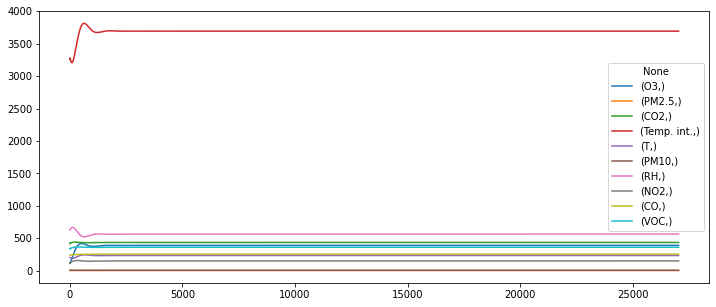

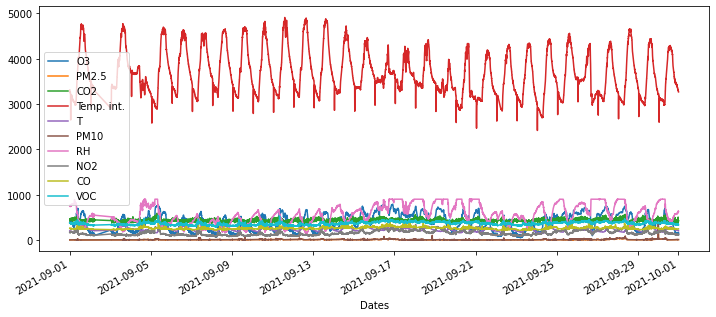

In [16]:
pred.plot(figsize=(12,5),legend=True)
df.plot(figsize=(12,5),legend=True)

Creating a data frame with the actual values and the avg values 

In [17]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline


conn = psycopg2.connect(host='playground.magentalab.it', port='55432', database='airqino', user='datareader', password='homntLZnlhQd9prtVA9SFezQek')

query=""" select * 
from columnvalues1month c join timebucket1month1day t on c."Dates" BETWEEN t.bucket AND t.bucket + interval '1 day'
 """

average_values = pd.read_sql(query, conn)
average_values=average_values.set_index('Dates')

In [18]:
average_values = average_values.iloc[selected_lag:, :]
average_values['Predictions'] = data['Predictions']
display(average_values)


,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-09-01 00:38:00,384.0,2.0,445.0,3262.0,198.0,3.0,748.0,165.0,253.0,372.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,0.0
2021-09-01 00:39:00,386.0,2.0,446.0,3262.0,197.0,2.0,753.0,167.0,254.0,374.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,0.0
2021-09-01 00:41:00,387.0,2.0,450.0,3262.0,196.0,3.0,758.0,168.0,253.0,373.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,0.0
2021-09-01 00:42:00,389.0,2.0,452.0,3256.0,194.0,2.0,765.0,170.0,254.0,375.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,0.0
2021-09-01 00:44:00,391.0,2.0,455.0,3256.0,193.0,3.0,774.0,169.0,253.0,366.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 23:56:00,167.0,8.0,420.0,3268.0,205.0,9.0,635.0,122.0,244.0,348.0,2021-09-30,368.964478,13.185145,439.241119,3557.648009,223.983854,14.625404,651.145318,162.200215,252.457481,369.176534,0.0
2021-09-30 23:57:00,125.0,8.0,420.0,3268.0,205.0,9.0,634.0,122.0,245.0,345.0,2021-09-30,368.964478,13.185145,439.241119,3557.648009,223.983854,14.625404,651.145318,162.200215,252.457481,369.176534,0.0
2021-09-30 23:59:00,123.0,8.0,417.0,3268.0,205.0,8.0,631.0,119.0,244.0,345.0,2021-09-30,368.964478,13.185145,439.241119,3557.648009,223.983854,14.625404,651.145318,162.200215,252.457481,369.176534,0.0


These are the anomalies

In [19]:
anomalies_average = average_values[(average_values['Predictions'] == 1)]
anomalies_average

,O3,PM2.5,CO2,Temp. int.,T,PM10,RH,NO2,CO,VOC,bucket,avgO3,avgPM2.5,avgCO2,avgTempInt,avgT,avgPM10,avgRH,avgNO2,avgCO,avgVOC,Predictions
Dates,,,,,,,,,,,,,,,,,,,,,,
2021-09-01 01:06:00,404.0,2.0,448.0,2650.0,192.0,2.0,763.0,193.0,235.0,364.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,1.0
2021-09-01 05:41:00,379.0,4.0,438.0,3056.0,178.0,4.0,863.0,222.0,258.0,390.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,1.0
2021-09-01 09:37:00,677.0,4.0,445.0,3850.0,251.0,4.0,482.0,153.0,258.0,367.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,1.0
2021-09-01 10:29:00,387.0,2.0,421.0,4031.0,272.0,2.0,411.0,129.0,341.0,407.0,2021-09-01,421.368757,1.867021,438.906482,3807.286929,246.261424,2.138298,517.145590,148.580234,248.297556,361.307120,1.0
2021-09-02 01:06:00,157.0,1.0,436.0,2950.0,226.0,2.0,529.0,123.0,233.0,332.0,2021-09-02,129.617647,0.970588,440.965686,3398.004902,216.397059,1.068627,550.475490,107.465686,240.857843,329.294118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 00:11:00,373.0,119.0,481.0,3212.0,193.0,155.0,855.0,172.0,270.0,386.0,2021-09-30,368.964478,13.185145,439.241119,3557.648009,223.983854,14.625404,651.145318,162.200215,252.457481,369.176534,1.0
2021-09-30 00:12:00,380.0,52.0,447.0,3212.0,193.0,62.0,855.0,171.0,260.0,381.0,2021-09-30,368.964478,13.185145,439.241119,3557.648009,223.983854,14.625404,651.145318,162.200215,252.457481,369.176534,1.0
2021-09-30 01:07:00,399.0,18.0,449.0,2600.0,187.0,20.0,879.0,193.0,233.0,367.0,2021-09-30,368.964478,13.185145,439.241119,3557.648009,223.983854,14.625404,651.145318,162.200215,252.457481,369.176534,1.0
